### Regresión polinómica para 2 variables (1 independiente y 1 dependiente)

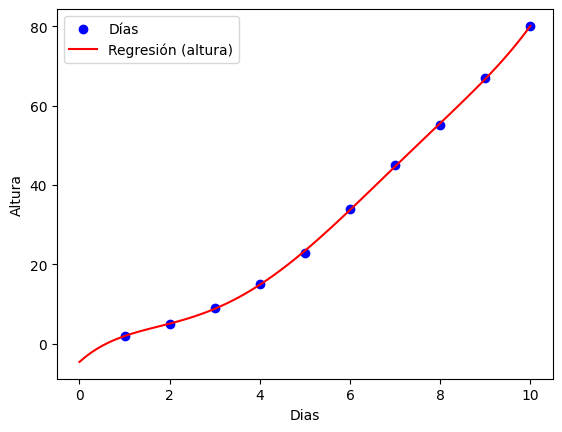

Coeficientes:  [ 0.00000000e+00  1.02073193e+01 -4.96153846e+00  1.40641026e+00
 -1.46620047e-01  5.38461538e-03]
-4.533333333156804


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

dias = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1) 
altura_planta = np.array([2, 5, 9, 15, 23, 34, 45, 55, 67, 80])

caracteristicas = PolynomialFeatures(degree = 5)
polinomio_dias = caracteristicas.fit_transform(dias)
modelo = LinearRegression()
modelo.fit(polinomio_dias,altura_planta)

dias_pred = np.linspace(0,10,100).reshape(-1,1)
polinomio_dias_pred = caracteristicas.fit_transform(dias_pred)

altura_pred = modelo.predict(polinomio_dias_pred)

plt.scatter(dias,altura_planta,color='Blue',label='Días')
plt.plot(dias_pred,altura_pred,color='Red',label='Regresión (altura)')
plt.xlabel('Dias')
plt.ylabel('Altura')
plt.legend()
plt.show()

print("Coeficientes: ",modelo.coef_)
print(modelo.intercept_)


Tienes un conjunto de datos que contiene información sobre el tamaño de diferentes casas y
sus precios de venta. Utiliza regresión polinómica para predecir el precio de una casa en
función de su tamaño.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

size = np.array([1000, 1500, 2000, 2500, 3000, 3500]).reshape(-1, 1)
n_size = np.array([1000, 1500, 2000, 2500, 3000, 3500])
price = np.array([300, 450, 600, 750, 900, 1050])

caracteristicas = PolynomialFeatures(degree=5)
polinomio_size = caracteristicas.fit_transform(size)
modelo = LinearRegression()
modelo.fit(polinomio_size, price)

size_pred = np.linspace(100, 3500, 100).reshape(-1, 1)
polinomio_size_pred = caracteristicas.fit_transform(size_pred)

price_pred = modelo.predict(polinomio_size_pred)

media_size = np.mean(n_size)
media_price = np.mean(price)
std = np.std(n_size)
var = np.var(n_size)
cov = np.cov(n_size, price)
r2 = r2_score(price, price_pred)

plt.scatter(size, price, color="Blue", label="Días")
plt.plot(size_pred, price_pred, color="Red", label="Regresión (altura)")
plt.xlabel("Tamaño")
plt.ylabel("Precio")
plt.legend()
plt.show()

print(
    "media x (Tamaño) {} media y (Precio) {} std (Desviación) {} var (Varianza) {} cov (Matriz de covarianza) {}".format(
        media_size, media_price, std, var, cov
    )
)
print('R2 score: ', r2)
print("Coeficientes: ", modelo.coef_)
print(modelo.intercept_)

ValueError: Found input variables with inconsistent numbers of samples: [6, 100]

#### Regresión polinómica con más de 1 variable independiente

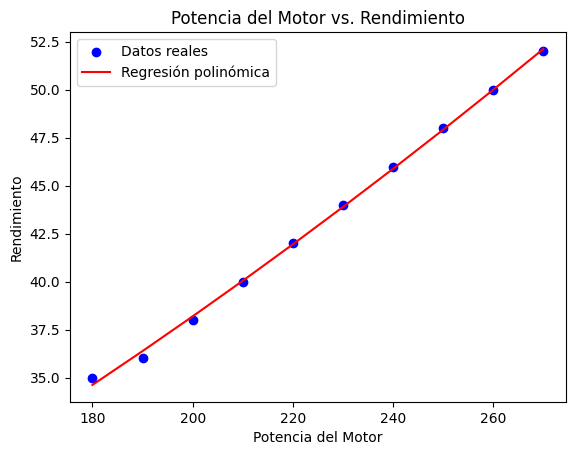

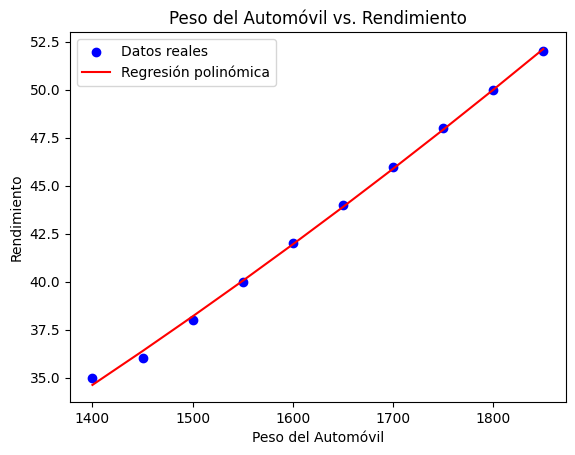

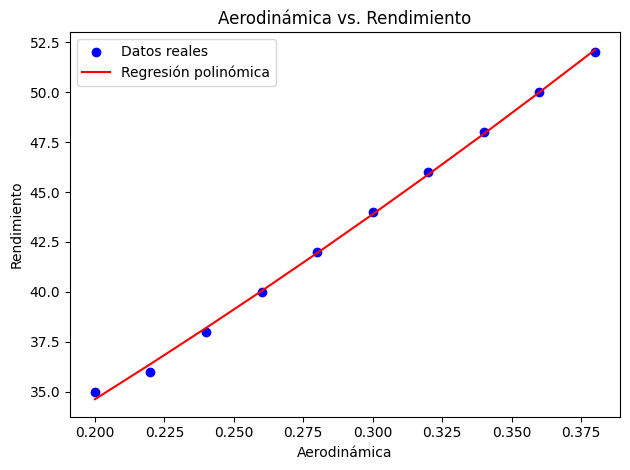

In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

potencia_motor = np.array([180, 190, 200, 210, 220, 230, 240, 250, 260, 270])
peso_automovil = np.array([1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850])
aerodinamica = np.array([0.20, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36, 0.38])
rendimiento = np.array([35, 36, 38, 40, 42, 44, 46, 48, 50, 52])

X = np.column_stack((potencia_motor, peso_automovil, aerodinamica))

scaler = StandardScaler()
X_escalada = scaler.fit_transform(X)

caracteristicas = PolynomialFeatures(degree=2)
polinomio_X = caracteristicas.fit_transform(X_escalada)

modelo = LinearRegression()
modelo.fit(polinomio_X, rendimiento)

y_pred = modelo.predict(polinomio_X)

indices_ordenados = potencia_motor.argsort()
potencia_motor_ordenado = potencia_motor[indices_ordenados]
peso_automovil_ordenado = peso_automovil[indices_ordenados]
aerodinamica_ordenado = aerodinamica[indices_ordenados]
y_pred_ordenado = y_pred[indices_ordenados]


plt.scatter(potencia_motor, rendimiento, color='blue', label='Datos reales')
plt.plot(potencia_motor_ordenado, y_pred_ordenado, color='red', label='Regresión polinómica')
plt.xlabel('Potencia del Motor')
plt.ylabel('Rendimiento')
plt.title('Potencia del Motor vs. Rendimiento')
plt.legend()
plt.show()

plt.scatter(peso_automovil, rendimiento, color='blue', label='Datos reales')
plt.plot(peso_automovil_ordenado, y_pred_ordenado, color='red', label='Regresión polinómica')
plt.xlabel('Peso del Automóvil')
plt.ylabel('Rendimiento')
plt.title('Peso del Automóvil vs. Rendimiento')
plt.legend()
plt.show()

plt.scatter(aerodinamica, rendimiento, color='blue', label='Datos reales')
plt.plot(aerodinamica_ordenado, y_pred_ordenado, color='red', label='Regresión polinómica')
plt.xlabel('Aerodinámica')
plt.ylabel('Rendimiento')poly

